# Maximum Likelihood Estimation (MLE)
This notebook will go over maximum likelihood estimation (MLE) and goodness of fit. We'll start off with a quick overview of classical vs Bayesian statistics.

### Classical or frequentist:

- Probabilities refer to relative frequencies of events. They are objective properties of the real world.

- Parameters (such as the fraction of coin flips, for a particular coin, that are heads) are fixed, unknown constants. Because they are not fluctuating, probability statements about parameters are meaningless.

- Statistical procedures should have well-defined long-run frequency properties. For example, a 95% confidence interval should bracket the true value of the parameter with a limiting frequency of at least 95%.

### Bayesian

- Probability describes the degree of subjective belief, not the limiting frequency. Probability statements can be made about things other than data, including model parameters and models themselves.

- Inferences about a parameter are made by producing its probability distribution — this distribution quantifies the uncertainty of our knowledge about that parameter. Various point estimates, such as expectation value, may then be readily extracted from this distribution.

**Example**: 

> A frequentist and a Bayesian statistician gather to watch a man flip a coin. He asks both of them before flipping the coin, "what is the probability of it landing on tails?" Both answer 50%. He then flips the coin and catches it in his hand, not allowing either statistician to see. He asks again what the probability of it having landed on tails is. The Bayesian statistician states, "well, obviously, for me, it's still 50%". On the other hand, the frequentist exclaims, "that's a silly question; there is no probability to it! Although I do not know the answer, the coin is either heads up or tails up right at this moment. The probability of it being tails up is either 100% or 0%."

Note that both are equally concerned with uncertainties about estimates. The main difference is whether one is allowed or not to discuss the "probability" of some aspect of the fixed universe having a certain value (e.g., the coin being heads or tails after it has already landed.)

## Maximum likelihood estimation (MLE)

### MLE approach

1. **The model**: Define a model $M$, $p(D|M)$, which is a hypothesis about how the data is generated. The accuracy of the resulting inferences relies heavily on the quality of our hypothesis, or how well the model describes the actual data generation process. Models are denoted $M(\boldsymbol{\theta})$ where $\boldsymbol{\theta}$ is a set of model parameters.

2. **Parameter estimates**: search for the best model parameters ($\boldsymbol{\theta}$) which *maximize* $p(D|M)$. From this, we obtain MLE *point estimates* $\boldsymbol{\theta^0}$ (i.e., we obtain k estimates, $\boldsymbol{\theta^0_p}, p = 1, . . . , k)$.

3. **Confidence intervals**: Determine the confidence region for model parameters. Such a confidence estimate can be obtained analytically in MLE using mathematical derivations specific to the chosen model. It can also be done numerically for arbitrary models using general frequentist techniques.

4. **Hypothesis testing**: Perform *hypothesis tests* as needed to make conclusions about models and point estimates.

### The Likelihood Function

Given a known or assumed behavior about how our data is generated (i.e., the distribution from which our sample was drawn), we can calculate the probability or likelihood of observing any given value. For example, assume that we draw our data {$x_i$} from a Gaussian parent distribution, then the likelihood of a given value $x_i$ is given by


$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\text{exp}\bigg(\frac{-(x-\mu)^2}{2\sigma ^2}\bigg).$$

We assume $x_i ... x_n$ are independent and identically distributed random samples from a pmf or pdf (e.g., they would **not** be independent in the case of drawing from a small parent sample without replacement). This assumption allows us to define the likelihood of the entire data set, $L$ as the *product* of likelihoods for each particular value,

$$L \equiv p(\{x_i\}|M(\boldsymbol{\theta})) = \prod \limits_{i=1}^n p(x_i|M(\boldsymbol{\theta})),$$

where $M$ is the model, $\boldsymbol{\theta}$ are the unknown parameters, and $x_i ... x_n$ are the data samples. $\boldsymbol{\theta}$ is a vector with components $\theta_p$ for $p = 1 ... k$. Note that instead of the specific one-dimensional set {$x_i$}, we often use $D$ for data in general cases. Additionally, since the product of likelihoods is no longer normalized to 1, we often use $L$'s logarithm as it can take on extremely small values when a data set is large.

If this is still unclear, $L$ is just the joint probability of obtaining the entire data set; recall that for independent events, the joint probability is simply the product of individual probabilities -- i.e., $p(A)p(B)$. 

$L$ can be considered both as a function of the data and as a function of the model. When computing the likelihood of some data value $x$, $L$ is a function of $x$ for some fixed model parameters. Given some fixed data set, it can be considered as a function of the model parameters instead. These parameters can then be varied to maximize the likelihood of observing this specific data set, as described next.

### MLE applied to homoscedastic Gaussian likelihood

**Example**: Assume we want to measure the apparent magnitude (brightness from Earth) of a non-variable star a fixed distance away from Earth. We have a series of measurements $\{x_i\}$. Our goal is to find the maximum likelihood estimate for the star's apparent magnitude and its confidence interval.

##### MLE approach for our problem

**1.** We determine a hypothesis (model) where 
- The observed star does not move nor fluctuate in brightness 
    
- The measurement errors are known to be Gaussian, and all the measurements have the same known error $\sigma$ (homoscedastic). 

**2.** We derive the expression for the likelihood of there being a star of a particular magnitude that gives rise to our individual measurements. We find the value of $\mu$ for which our observations are maximally likely (maximize the likelihood function).

**3.** We determine the error bars (confidence intervals) on our measurement. 

**4.** We test whether what we've observed is consistent with our adopted model. For example, is it possible that the star was really a misidentified variable star that fluctuates in brightness?

##### The Probability of Obtaining a Particular Measurement

As our measurement errors are Gaussian, the probability density of each measurement is given by:

$$ p(x| M(\boldsymbol{\theta})) = p(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp \bigg(\frac{-(x_i-\mu)^2}{2\sigma^2}\bigg) $$

##### The Probability of the Dataset

If we want to know the joint probability of obtaining that entire set, we compute the product of all the individual probabilities:

$$ \qquad\qquad L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi}\sigma} \exp \bigg(\frac{-(x_i-\mu)^2}{2\sigma^2}\bigg)\qquad\qquad (1)$$

Here there is only one model parameter, that is, $k = 1$ and $\theta_p = \mu$ (recall that all the measurements have the same known error $\sigma$). Now we can find the maximum likelihood estimate, $\mu_0$, as the value of $\mu$ that maximizes $L$, as follows.

##### Maximizing L

The log-likelihood function is defined by $\ln L \equiv \ln[L(\boldsymbol\theta)]$. Its maximum occurs at the same place as that of the likelihood function, and the same is true of the likelihood function times any constant. The value of the model parameter $\mu$ that maximizes $\ln L$ can be determined using the condition

$$ \frac{d\ln L(\mu)}{d\mu}\bigg|_{\mu^0} \equiv 0,$$

which is the location where the first derivative of L is zero. It might be helpful to know that we can write the product of the exponentials as the exponential of the sum of the arguments,

$$ L = \bigg(\prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}}\bigg)\exp\bigg(-\frac{1}{2}\sum\bigg[\frac{(x_i -\mu)}{\sigma}\bigg]^2\bigg). $$

Taking the natural log of $L$ yields
$$\ln L(\mu) = \text{constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}, $$


and taking of derivative with respect to $\mu$ gives

$$\sum_{i=1}^N \frac{x_i-\mu^0}{\sigma^2} = 0. $$

Now we can ignore $\sigma$ since it's constant and algebraically solve for $\mu$,

$$\sum_{i=1}^N x_i - \sum^N_{i=1} \mu^0 = 0 $$

$$\sum_{i=1}^N x_i = N\mu^0 $$

$$\mu^0 =\frac{1}{N}\sum_{i=1}^N x_i  = \overline{x} $$

Thus $\mu^0$ is simply the arithmetic mean of all measurements!

##### Plotting our dataset and L

We have 120 measurements for the apparent magnitude of our star drawn from a Gaussian distribution with $\mu = 8$ (mean apparent magnitude) and $\sigma = 2$ (the error in our measurements). In the figure on the left, we will plot the histogram of our measurements along with the true parent distribution plotted over top of it. In the figure on the right, we will calculate $L$ using equation (1), varying the value of $\mu$ from 0 to 16.

Mean of our dataset: 7.8
The value of mu that maximizes L: 7.8


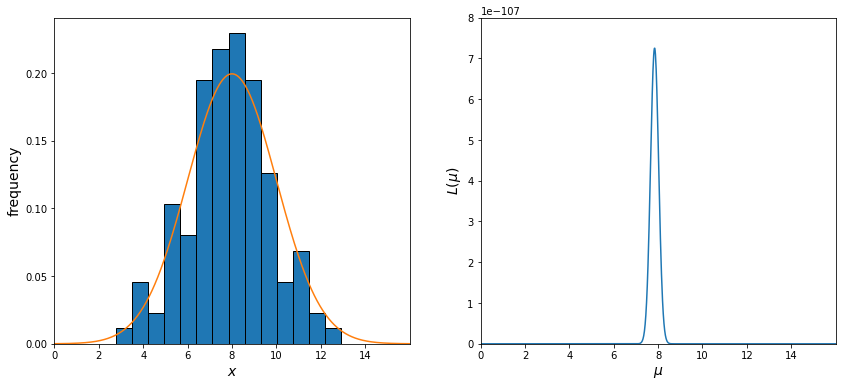

In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

np.random.seed(seed=42)
Nsamples= 120
mu_true = 8
x = np.linspace(0, 16, 1000)

# draw 120 pints from a Gaussian with mu = 8 and sigma = 2
measurements = np.random.normal(mu_true, 2, Nsamples)

# caluclate L for 1000 possible values of mu from 0 to 16
products = []
for i in x:
    j = np.prod(norm(measurements, 2).pdf(i))
    products.append(j)

# plot the results
fig, ax = plt.subplots(1,2)                
fig.set_size_inches(14,6)   

ax[0].hist(measurements, bins='fd', density = True, edgecolor='black');
ax[0].plot(x, norm(8, 2).pdf(x));
ax[0].set_xlabel('$x$',fontsize = 14)
ax[0].set_ylabel('frequency',fontsize = 14)
ax[0].set_xlim(0, 16)
ax[0].set_xticks(np.arange(0,16,2))

ax[1].plot(x,products)
ax[1].set_xlim(0, 16)
ax[1].set_ylim(0, 8*10**(-107))
ax[1].set_xticks(np.arange(0,16, 2))
ax[1].set_xlabel('$\mu$', fontsize = 14)
ax[1].set_ylabel(r'$L(\mu)$',fontsize = 14);


print(f"""Mean of our dataset: {np.mean(measurements):.2}
The value of mu that maximizes L: {x[products.index(max(products))]:.2}""")

As we expect, the value of $\mu$, which maximizes $L$, is the average of our measurements!

## Properties of maximum likelihood estimators

Maximum likelihood estimators have several optimality properties under certain assumptions. The critical assumption is that the data truly come from the specified model class (e.g., they really are drawn from a Gaussian, if that is the model used). Additional assumptions include some relatively mild regularity conditions, which amount to various smoothness conditions, certain derivatives existing, etc.

Maximum likelihood estimators have the following properties:

- They are **consistent estimators**; that is, they can be proven to converge to the true parameter value as the number of data points increases.

- They are **asymptotically normal estimators**. The distribution of the parameter estimate, as the number of data points increases to infinity, approaches a normal distribution centered at the MLE, with a certain spread. This spread can often be easily calculated and used as a confidence band around the estimate, as discussed below.

- They **asymptotically achieve the theoretical minimum possible variance, called the Cramér – Rao bound**. In other words, they achieve the best possible error given the data at hand; that is, no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate ($\text{MSE} = V + \text{bias}^2$).

## MLE confidence intervals

To determine the uncertainty of an MLE, we can take the second partial derivative of its natural log with respect to the parameter(s) in question

$$ \qquad\qquad\qquad F_{jk} = -\frac{d^2 \ln{L}}{d\theta_j d\theta_k}\bigg|_{\theta = \theta_0}\qquad\qquad\qquad\qquad (2) $$

These uncertainties form a covariance matrix $\Sigma$,

$$\Sigma_{jk} = [F^{-1}]_{jk},$$

where 

$$\sigma_{j} = \sqrt{\Sigma_{jj}}.$$


The diagonal elements, $\Sigma_{ii}$, correspond to marginal error bars for parameters $\theta_i$. If $\Sigma_{jk}$ = 0 for $j\neq k$, then the estimated values of parameters are uncorrelated (i.e., the error in one parameter does not affect other parameters)

If $\Sigma_{jk} \neq 0$ when $j \neq k$, errors for parameters $\theta_j$ and $\theta_k$ are correlated (e.g., in the two-dimensional case, the likelihood surface is a bivariate Gaussian with principal axes that are not aligned with coordinate axes). This correlation tells us that some combinations of parameters are better determined than others.

In our example where we had homoscedastic errors from a Gaussian distribution, the uncertainty of the mean $\mu$ is

$$\sigma_\mu = \bigg(-\frac{d^2\ln L(\mu)}{d\mu^2}\bigg|_{\mu^0}\bigg) ^{-1/2} = \bigg(\sum^N_{i=1}\frac{1}{\sigma_i^2}\bigg)^{-1/2} = \frac{\sigma}{\sqrt{N}} $$

since $\sigma$ was constant. Note that this is the same equation for the standard error of the mean.

## The MLE applied to a heteroscedastic Gaussian likelihood

With heteroscedastic errors, the uncertainty for each measurement varies, but the values for $\sigma$ are still known. Perhaps the light of the moon or inconsistent weather were affecting our measurements. Everything else is the same (i.e, the measurements still come from a Gaussian) but since $\sigma$ is no longer constant, the expression for the log-likelihood becomes

$$\ln L = \text{constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}. $$

Taking the derivative, we get 

$$ \frac{d\ln L(\mu)}{d\mu}\bigg|_{\mu^0} = \sum_{i=1}^N \frac{(x_i - \mu^0)}{\sigma_i^2} = 0.$$

Now we can algebraically solve for $\mu^0$

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu^0}{\sigma_i^2},$$

and to simplify our expression, we can set the weights $\sigma_i^{-2}$ to $w_i$

$$\mu^0 = \frac{\sum_{i=1}^N \frac{x_i}{\sigma_i^2}}{\sum_{i=1}^N \frac{1}{\sigma_i^2}} = \frac{\sum^N_i w_ix_i}{\sum_i^N w_i}. $$

Thus, $\mu^0$ is simply a weighted arithmetic mean of all measurements. We can also calculate the uncertainty of $\mu^0$ using eq $(2)$ above.

$$\sigma_\mu = \bigg(-\frac{d^2\ln L(\mu)}{d\mu^2}\bigg|_{\mu^0}\bigg) ^{-1/2}  = \bigg(\sum^N_{i=1}\frac{1}{\sigma_i^2}\bigg)^{-1/2} = \bigg(\sum^N_i w_i\bigg)^{-1/2} $$


## The MLE in the case of truncated and censored data

The probability of drawing a measurement $x$ is quantified using the selection probability, or selection function, $S(x)$. When $S(x)=0$ for $x > x_{\text{max}}$ (analogously for $x < x_\text{min}$), the data set is **truncated** and we know nothing about sources with $x > _{\text{max}}$ (not even whether they exist or not). A related but different concept is censored data sets, where a measurement of an existing source was attempted, but the value is outside of some known interval (a familiar astronomical case is an “upper limit” for flux measurement when we look for, e.g., an X-ray source in an optical image of the same region on the sky but do not find it).

Looking back at our Gaussian example, we will now show how to account for data truncation using the MLE approach. For simplicity, we will assume that the selection function $S(x)=1$ for $x_\text{min} \leq x \leq x_{\text{max}} $ and $S(x)=0$ otherwise.


When dealing with truncated data, the likelihood for a single datum must be a properly normalized pdf; this is accounted for with a renormalization constant. In the case of a Gaussian error distribution (we assume that $\sigma$ is known), the likelihood for a single data point is

$$ p(x_i|\mu,\sigma,x_{\text{min}},x_{\text{max}}) = C(\mu,\sigma, x_{\text{min}},x_{\text{max}}) \frac{1}{\sqrt{2\pi}\sigma} \exp \bigg(\frac{-(x_i-\mu)^2}{2\sigma^2}\bigg)$$

where the renormalization constant is evaluated as

$$ C(\mu,\sigma,x_{\text{min}},x_{\text{max}}) = (P(x_{\text{max}}|\mu, \sigma) - P(x_{\text{min}}|\mu,\sigma))^{-1} $$

with the cumulative distribution function (cdf) for a Gaussian centered at $\mu$ with a standard deviation $\sigma$ (see equation 3.47 in the textbook).

The log-likelihood is

$$ \quad \ln L(\mu) = \text{constant} - \sum^N_{i=1} \frac{(x_i-\mu)^2}{2\sigma^2} + N \ln [C(\mu,\sigma, x_{\text{min}},x_{\text{max}})].\quad (3) $$


This is very close to the equation we had before; the difference is in our third term, which accounts for truncation. Note that because the cdf contains the Gauss error function, there isn't a simple close-form expression for $\mu^0$.



***EXAMPLE***
>On the planet of Caladan, meteorites frequently hit the surface. Suppose some collectors are creating a museum of large meteorites, which they've defined as any meteorite larger than 45 meters in diameter. Before they get entered into the museum, they are held in a back room so a new exhibit can be set up. We also know that on this planet, meteorites are normally distributed, centered at 25 meters, with a standard deviation of 13. Suppose you were to enter the back room and find a meteorite of diameter $S_d$. What is your best estimate for the mean diameter of the meteorites that land on Caladan if you knew that the standard deviation is 13 but didn't know the mean was 25?

We can answer this by finding the maximum of $\ln{L}$ given by equation $(3)$, evaluated for $x_\text{min}$ = 45, $x_\text{max} = \infty $, $N$ = 1, $x_1=S_d$, and $\sigma$ = 13. Whether $\mu^0$, the value of $\mu$ which maximizes $L$, is larger or smaller than 25 depends on the exact value of $S_d$. 

First we will show that the mean value of a $N$(25,13) Gaussian truncated at $x_\text{min}$ = 45 is ~50.75. For this, we will use `scipy.stats.truncnorm` ,which allows us to define the bounds of our truncated Gaussian.

Mean = 50.7


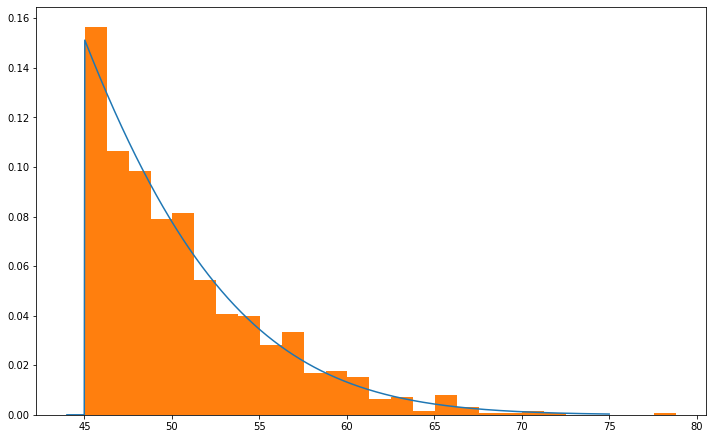

In [2]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import truncnorm
from matplotlib import pyplot as plt

fig = plt.subplots(figsize=(12, 7.5))

x = np.linspace(44, 75, 1000)
mean = 25
std = 13
x_min = 45
x_max = np.inf
a, b = (x_min - mean) / std, (x_max - mean) / std
r = truncnorm.rvs(a, b, loc = mean, scale = std, size=1000)
plt.plot(x, truncnorm.pdf(x,a,b,loc = mean, scale = std));
plt.hist(r, bins = 'fd', density = True);
print(f'Mean = {np.mean(r):.3}')

Next, we need to maximize $L$. Taking the derivative of this function is quite difficult as we would need to take the partial derivative of the cumulative distribution function (which contains the Gauss error function) with respect to $\mu$. We can avoid this by using `scipy.optimize.minimize` on the *negative* log-likelihood function. First, we will define the log-likelihood function and allow it to take one to two arguments of $S_d$.

In [3]:
from scipy.stats import norm
const = (-1/2)*(np.log(2*np.pi*(13**2)))

def neg_log_likelihood(mu, x_1, x_2=0, n=1, sum_term_x2 = 0):
    sum_term_x1 = ((x_1 - mu)**2)/(2*(13**2))
    
    if x_2 != 0:
        sum_term_x2 = ((x_2 - mu)**2)/(2*(13**2))
    
    norm_constant = np.log((norm(mu,13).cdf(x_max) - (norm(mu,13).cdf(x_min)))**(-1))
    logL = -(const - (sum_term_x1+sum_term_x2)+(n*norm_constant))
    return logL

Then we will minimize it (i.e., maximizing the *positive* log-likelihood) with `scipy.optimize.minimize`, which takes an initial guess for the value of $\mu$ and our value(s) of $S_d$. We'll see that if $S_d$ is smaller than ~50.75, the implied mean diameter of the meteorites that land on the surface is less than 25 meters. Conversely, if $S_d$ is greater than ~50.75, then $\mu^0$ is greater than 25. As an example, we will show the MLE given $S_d$ = 49 and $S_d$ = 52 with initial guesses for $\mu^0$ equal to 15 and 52 respectively. We can also look at the case given two meteorites $S_{d1}$ and $S_{d2}$ just to illustrate the point further. 

In [4]:
print(f"""Value of μ which maximizes lnL for:

S_d = 49: {minimize(neg_log_likelihood,15,args = (49)).get("x")[0]:.4}
S_d = 52: {minimize(neg_log_likelihood,30,args = (52)).get("x")[0]:.4}

Values of μ which maximize] lnL for:

S_d1 = 49, S_d2 = 50 (both meteorites with diameters below the mean): {minimize(neg_log_likelihood,15,args = (49,50,2)).get("x")[0]:.4}
S_d1 = 50, S_d2 = 51 (one above the mean, one below the mean): {minimize(neg_log_likelihood,25,args = (50,51,2)).get("x")[0]:.4}
S_d1 = 52, S_d2 = 53 (both meteorites with diameters above the mean): {minimize(neg_log_likelihood,30,args = (52,53,2)).get("x")[0]:.4}""")

Value of μ which maximizes lnL for:

S_d = 49: 10.21
S_d = 52: 32.85

Values of μ which maximize] lnL for:

S_d1 = 49, S_d2 = 50 (both meteorites with diameters below the mean): 15.72
S_d1 = 50, S_d2 = 51 (one above the mean, one below the mean): 24.1
S_d1 = 52, S_d2 = 53 (both meteorites with diameters above the mean): 35.15


For an arbitrary number of meteorites, their mean diameter must be greater than 50.75 to obtain $\mu^0 > 25$. If all the meteorites in the back had a diameter of around 45 meters, bunched next to the selection threshold, it is likely that the mean diameter of meteorites that land is below 25 meters! Therefore, if you run into a large meteorite, do not automatically assume that all meteorites have large diameters on average because it could be due to selection effects.

## The goodness of fit and model selection

We now know how to estimate the "best-fit" model parameters and their uncertainties using maximum likelihood estimation, but we still don't know how "good" the fit is. For example, if we assume a Gaussian model when in reality, our data is not Gaussian, our results might not be very insightful. In the following section, we will quantify how well our model fits the data. 

## The goodness of fit for a model

We will call the maximum value of the likelihood $L^0$. Assuming our model is correct, we can then ask how likely it is that this value would have arisen by chance. If it's very unlikely to obtain $L^0$ (or $\ln{L^0}$) by randomly drawing data from the best-fit distribution, the best-fit model is **not** a good description of the data.

Going back to our case of a Gaussian likelihood, we can rewrite

$$\ln{L}(\mu) = \text{constant} - \sum^N_{i=1} \frac{(x_i - \mu)^2}{2\sigma^2} $$

as

$$ \ln{L} = \text{constant} - \frac{1}{2}\chi^2 $$

where

$$\qquad\qquad\qquad\chi^2 = \sum^N_{i=1}\bigg( \frac{(x_i-\mu)}{\sigma}\bigg)^2\qquad\qquad\qquad (4)$$

Thus, the distribution of $\ln{L}$ can be determined from the $\chi^2$ distribution with $N-k$ degrees of freedom, where $k$ is the number of model parameters determined from data. In our example with homoscedastic errors, $k = 1$ since $\sigma$ was fixed, and with heteroscedastic errors, $k=2$. Essentially we are checking how likely it is that our value of $\chi^2$ would arise if our model is correct. If the probability is low, it's an indication that we might need to rethink our model.


The distribution of $\chi^2$ does **not** depend on the values of $\mu$ and $\sigma$; the expectation value of the $\chi^2$ distribution is $N-k$ and its standard deviation is $\sqrt{2(N-k)}$. For a "good fit", we expect that $\chi^2$ per degree of freedom,

$$\chi_{\text{dof}}^2 =\frac{1}{N-k} \sum^N_{i=1} \bigg( \frac{(x_i-\mu)}{\sigma}\bigg)^2 \approx 1 $$

If instead $(\chi_{\text{dof}}^2 -1)$ is much larger than $\sqrt{2(N-k)}$, it is unlikely that the data were generated by the assumed model. The likelihood of a particular value of $\chi^2$ for a given number of degrees of freedom can be found in tables or evaluated using the function `scipy.stats.chi2`.

In the example below, we will show an example of a $\chi^2$ value that fits the model and one that doesn't. For the correct model, we will draw from a Gaussian distribution and use equation $(4)$ to solve for $\chi^2$. For the incorrect model, we will still use equation $(4)$ but instead draw from a Poisson distribution. 

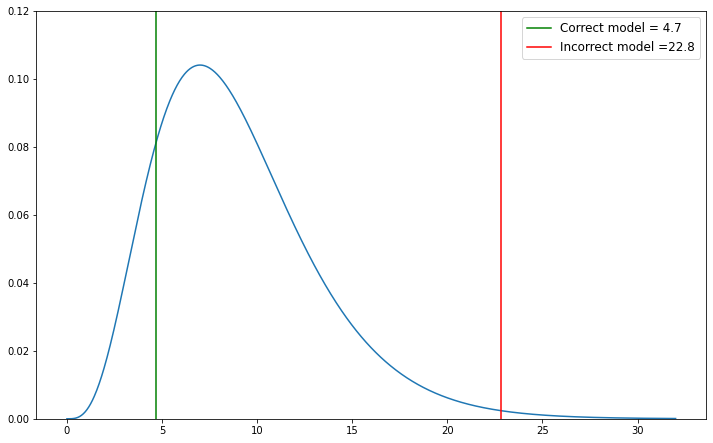

In [5]:
import numpy as np
from scipy.stats import norm, chi2
from matplotlib import pyplot as plt

np.random.seed(seed=42)
N_samples = 10
mu = 25
sigma = 13

## Correct model
x = np.random.normal(mu, sigma, N_samples)
mu = np.average(x)
chi_2 = np.sum(np.square((x - mu) / sigma))

## Incorrect model
x_poisson = np.random.poisson(mu, Nsamples)
mu_poisson = np.average(x_poisson)
chi_2_poisson = np.sum(np.square((x_poisson - mu_poisson) / sigma))

#Plot the results
fig = plt.subplots(figsize=(12, 7.5))
z = np.linspace(0,32,1000)

plt.plot(z, chi2.pdf(z, N_samples - 1))
plt.axvline(chi_2, color='green',label = f"Correct model = {chi_2:.3}");
plt.axvline(chi_2_poisson, color='red',label = f"Incorrect model ={chi_2_poisson:.3}");

plt.ylim(0,0.12)
plt.legend(loc = "upper right", fontsize = 12);

As we can see, the $\chi^2$ value drawn from a Poisson distribution is less likely to occur, whereas the $\chi^2$ value drawn from the Gaussian is more likely.

***EXAMPLE*** 
> Consider the simple case of the luminosity of a single star being measured multiple times. Our model is that of a star with **no intrinsic luminosity variation**.

We will examine four different scenarios:
- Correct model with correct errors
- Correct model with overestimated errors
- Correct model with underestimated errors
- Incorrect model with correct errors

First, we will define $N$, $\ell^0$ (the constant luminosity of our star), and $\sigma_\ell$ (the measurement error).

our models, and our errors.

In [6]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

np.random.seed(42)
N = 50
luminosity = 10
sigma_L = 0.2

t = np.linspace(0, 1, N)
L_obs = np.random.normal(luminosity, sigma_L, N)

y_vals = [L_obs, L_obs, L_obs, L_obs + 0.5 - t ** 2]
y_errs = [sigma_L, sigma_L * 2, sigma_L / 2, sigma_L]
titles = ['correct errors',
          'overestimated errors',
          'underestimated errors',
          'incorrect model']

Next, we will plot our scenarios.

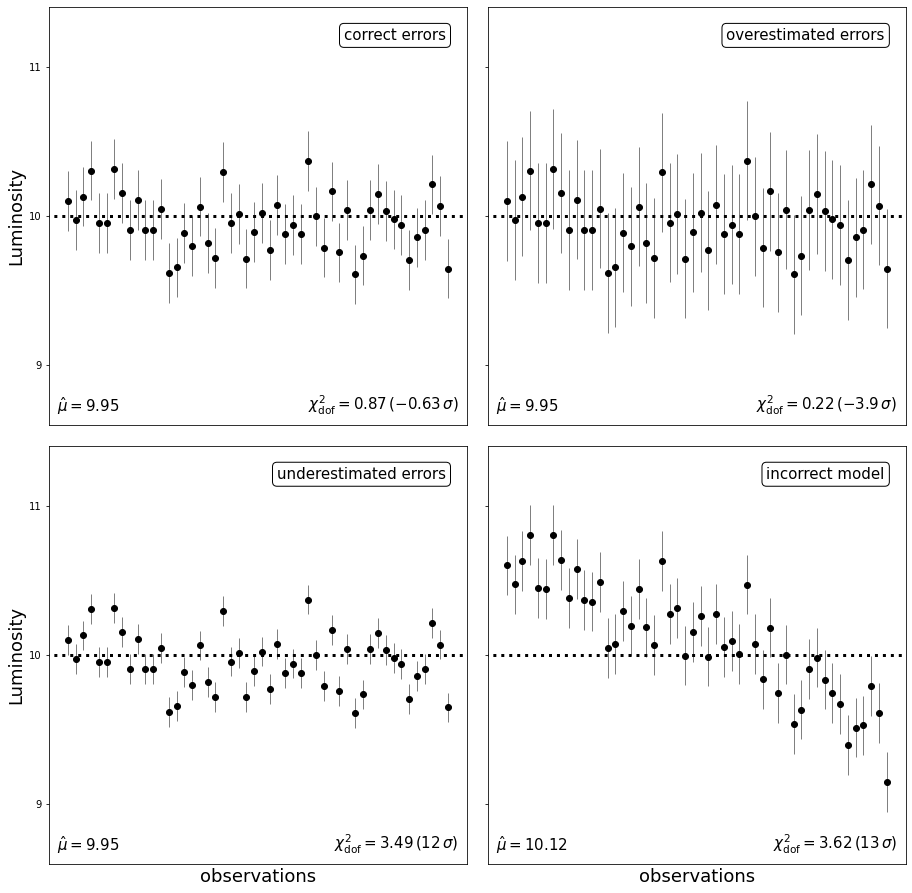

In [7]:
# Plot the results
fig = plt.figure(figsize=(14, 14))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

for i in range(4):
    ax = fig.add_subplot(2, 2, 1 + i, xticks=[])

    # compute the mean and the chi^2/dof
    mu = np.mean(y_vals[i])
    z = (y_vals[i] - mu) / y_errs[i]
    chi2 = np.sum(z ** 2)
    chi2dof = chi2 / (N - 1)

    # compute the standard deviations of chi^2/dof
    sigma = np.sqrt(2. / (N - 1))
    nsig = (chi2dof - 1) / sigma

    # plot the points with errorbars
    ax.errorbar(t, y_vals[i], y_errs[i],fmt='.k', ecolor='gray', lw=1,ms = 12)
    ax.plot([-0.1, 1.3], [luminosity, luminosity], ':k', lw=3)

    # Add labels and text
    ax.text(0.95, 0.95, titles[i], ha='right', va='top',
            transform=ax.transAxes,fontsize = 15,
            bbox=dict(boxstyle='round', fc='w', ec='k'))
    ax.text(0.02, 0.02, r'$\hat{\mu} = %.2f$' % mu, ha='left', va='bottom',
            transform=ax.transAxes, fontsize = 15)
    ax.text(0.98, 0.02, r'$\chi^2_{\rm dof} = %.2f\, (%.2g\,\sigma)$'
            % (chi2dof, nsig), ha='right', va='bottom', 
            transform=ax.transAxes,fontsize = 15)

    # set axis limits
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(8.6, 11.4)

    # set ticks and labels
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    if i > 1: ax.set_xlabel('observations', fontsize = 18)
    if i % 2 == 0: ax.set_ylabel('Luminosity',fontsize = 18)
    else: ax.yaxis.set_major_formatter(plt.NullFormatter())

plt.show()

$\chi^2_{\text{dof}} \approx 1$ indicates that the model fits the data well (upper-left panel). $\chi^2_{\text{dof}}$ much smaller than 1 (upper-right panel) is an indication that the errors are overestimated. $\chi^2_{\text{dof}}$ much larger than 1 is an indication either that the errors are underestimated (lower-left panel) or that the model is not a good description of the data (lower-right panel). In this last case, it is clear from the data that the star’s luminosity is varying with time.

## Model comparison

A popular general classical method for model comparison is the Akaike information criterion (AIC). The AIC is a simple approach based on an asymptotic approximation; the preferred approach to model comparison for the highest accuracy is cross-validation (discussed in  chapter 8.11.1), which is based on only the finite data at hand rather than approximations based on infinite data. Nonetheless the AIC is easy to use, and often effective for simple models.
The AIC is computed as 

$$\text{AIC} \equiv -2\ln{L^0(M)} +2k + \frac{2k(k+1)}{N-k-1}$$

Under the assumption of normality, the first term is equal to the model’s $\chi^2$ (up to a constant). When multiple models are compared, the one with the *smallest* AIC is the best model to select. If the models are equally successful in describing the data (they have the same value of $L^0(M)$, then the model with fewer free parameters wins.